In [1]:
import pandas as pd
import json
import numpy as np
import glob
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/My Drive/personality_reddit'

Mounted at /content/drive/
/content/drive/My Drive/personality_reddit


In [15]:
fnames = glob.glob('metrics_FFN/triplet_loss_FFN_1.0/*')
fnames2 = glob.glob('metrics_shuffle_02_10/triplet_loss_1.0/*')

In [4]:
ravg = lambda x: [np.mean(x[i:i+200]) for i in range(len(x)-200)]
for fns in [fnames]:
  for idx, f in enumerate(fns):
      with open(f) as fh:
          d = json.load(fh)
      for e in d.keys().strip('_')[1]:
          ms = d[f'epoch_{e}']['metrics']
          ls = d[f'epoch_{e}']['losses']
          try:
            test_ms = d[f'epoch_{e}']['test_metrics']
            test_ls = d[f'epoch_{e}']['test_losses']
          except:
            pass
          dps = [float(x) for x in d[f'epoch_{e}']['dp']]
          dns = [float(x) for x in d[f'epoch_{e}']['dn']]
          if e == 0:
            das = [float(x)/2 for x in d[f'epoch_{e}']['da']]
          else:
            das = [float(x) for x in d[f'epoch_{e}']['da']]
          adps, adns, adas = ravg(dps), ravg(dns), ravg(das)
          ams, als = ravg(ms), ravg(ls)
          try:
            tams, tals = ravg(test_ms), ravg(test_ls)
          except:
            pass
          # Create dataset with loss and metrics
          df = pd.DataFrame(zip(ams, als))
          df.columns = ['correct', 'loss']
          df['step'] = range(len(ams))
          df['epoch'] = 'epoch_' + str(e)
          # Create dataset with all distances
          ddf = pd.DataFrame(zip(adps, adns, adas))
          ddf.columns = ['dp', 'dn', 'da']
          ddf['step'] = range(len(adps))
          ddf['epoch'] = 'epoch_' + str(e)  
          # Create dataset with test metrics
          try:
            tdf = pd.DataFrame(zip(tams, tals))
            tdf.columns = ['correct', 'loss']
            tdf['step'] = range(len(tams))
            tdf['epoch'] = 'epoch_' + str(e)    
          except:
            pass
          if e == 0:
              addf = ddf
              adf = df
              atdf = tdf
          else:
              addf = pd.concat([addf, ddf], ignore_index=True)
              adf = pd.concat([adf, df], ignore_index=True)
              try:
                test = d[f'epoch_{e}']['test_losses']
                atdf = pd.concat([atdf, tdf], ignore_index=True)
              except:
                pass
          try:
              tmetrics = np.mean(d[f'epoch_{e}']['test_metrics'])
              print(f'Epoch{e}, {tmetrics}')
          except:
              pass

Epoch0, 0.6111218693519236
Epoch1, 0.6200619674670798
Epoch3, 0.6296475600309838
Epoch4, 0.6322618125484121
Epoch5, 0.6318099664342887


KeyError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


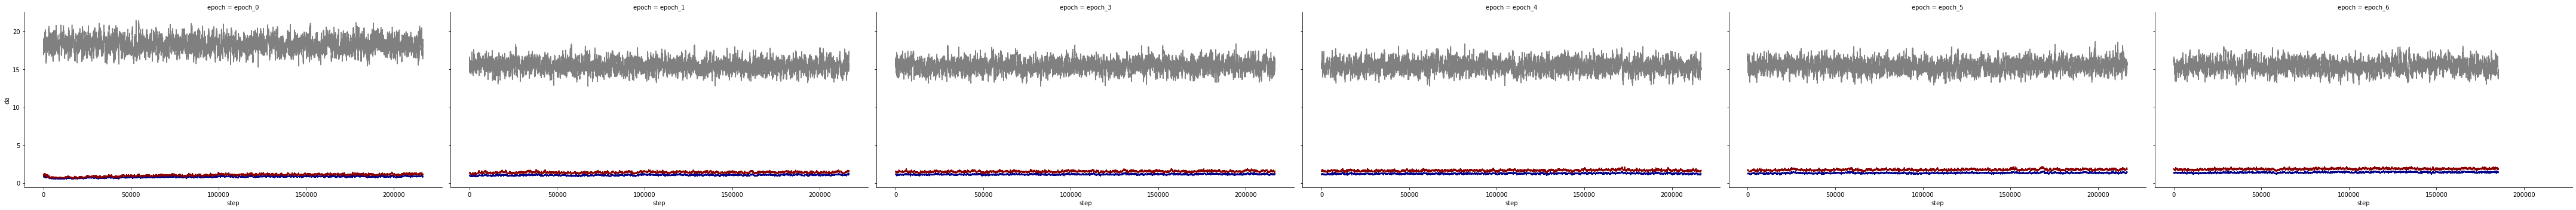

In [12]:
g = sns.FacetGrid(data=addf, col='epoch', size=5, aspect=2, sharey=True)
g.map(sns.lineplot, 'step', 'dp', color='darkblue', label='distance_positive')
g.map(sns.lineplot, 'step', 'dn', color='darkred', label='distance_negative')
#g.map(sns.lineplot, 'step', 'da', color='grey', label='within_anchor')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


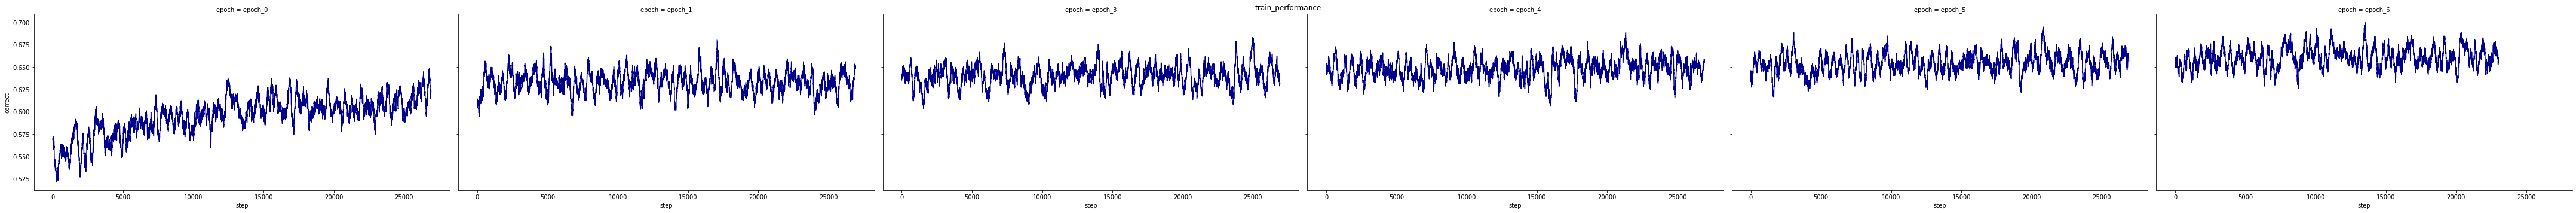

In [10]:
g = sns.FacetGrid(data=adf, col='epoch', size=5, aspect=2, sharey=True)
g.map(sns.lineplot, 'step', 'correct', color='darkblue')
plt.suptitle('train_performance')
plt.show()

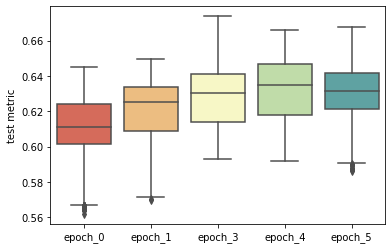

In [8]:
sns.boxplot(data=atdf, x='epoch', y='correct', palette='Spectral')
plt.ylabel('test metric')
plt.xlabel('')
plt.show()

In [25]:
for fns in [fnames2]:
  for idx, f in enumerate(fns):
      with open(f) as fh:
          d = json.load(fh)
      for ep in range(6):
          e = ep
          ms = d[f'epoch_{e}']['metrics']
          ls = d[f'epoch_{e}']['losses']
          try:
            test_ms = d[f'epoch_{e}']['test_metrics']
            test_ls = d[f'epoch_{e}']['test_losses']
          except:
            pass
          dps = [float(x) for x in d[f'epoch_{e}']['dp']]
          dns = [float(x) for x in d[f'epoch_{e}']['dn']]
          if e == 0:
            das = [float(x)/2 for x in d[f'epoch_{e}']['da']]
          else:
            das = [float(x) for x in d[f'epoch_{e}']['da']]
          adps, adns, adas = ravg(dps), ravg(dns), ravg(das)
          ams, als = ravg(ms), ravg(ls)
          try:
            tams, tals = ravg(test_ms), ravg(test_ls)
          except:
            pass
          # Create dataset with loss and metrics
          df = pd.DataFrame(zip(ams, als))
          df.columns = ['correct', 'loss']
          df['step'] = range(len(ams))
          df['epoch'] = 'epoch_' + str(e)
          # Create dataset with all distances
          ddf = pd.DataFrame(zip(adps, adns, adas))
          ddf.columns = ['dp', 'dn', 'da']
          ddf['step'] = range(len(adps))
          ddf['epoch'] = 'epoch_' + str(e)  
          # Create dataset with test metrics
          try:
            tdf = pd.DataFrame(zip(tams, tals))
            tdf.columns = ['correct', 'loss']
            tdf['step'] = range(len(tams))
            tdf['epoch'] = 'epoch_' + str(e)    
          except:
            pass
          if e == 0:
              addf = ddf
              adf = df
              atdf = tdf
          else:
              addf = pd.concat([addf, ddf], ignore_index=True)
              adf = pd.concat([adf, df], ignore_index=True)
              try:
                test = d[f'epoch_{e}']['test_losses']
                atdf = pd.concat([atdf, tdf], ignore_index=True)
              except:
                pass
          try:
              tmetrics = np.mean(d[f'epoch_{e}']['test_metrics'])
              print(f'Epoch{e}, {tmetrics}')
          except:
              pass

Epoch0, 0.6840950167828557
Epoch1, 0.7009424218951718
Epoch2, 0.7035889491350374
Epoch3, 0.7089465530596437
Epoch4, 0.7145946294861865
Epoch5, 0.7140459592047509


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: ignored

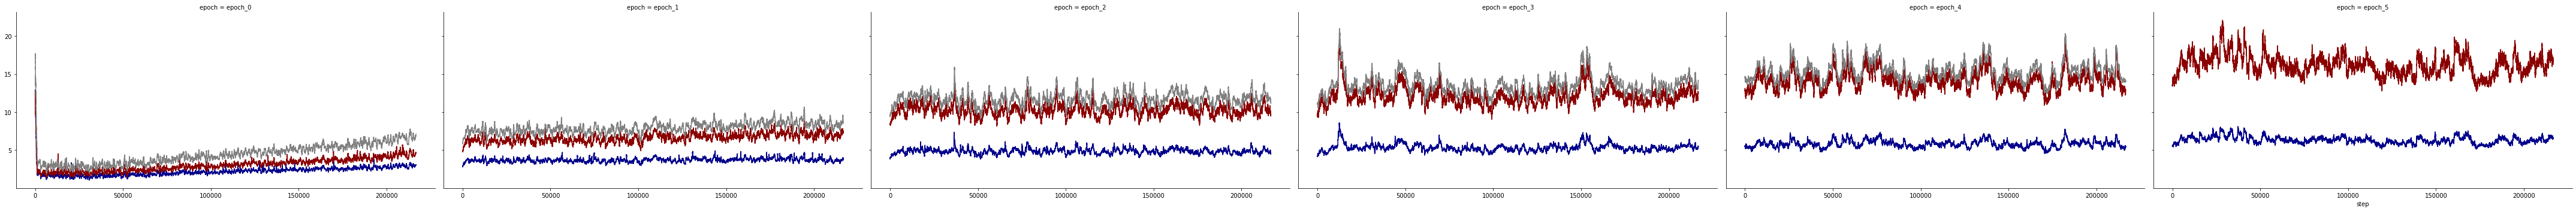

In [28]:
g = sns.FacetGrid(data=addf, col='epoch', size=5, aspect=2, sharey=True)
g.map(sns.lineplot, 'step', 'dp', color='darkblue', label='distance_positive')
g.map(sns.lineplot, 'step', 'dn', color='darkred', label='distance_negative')
g.map(sns.lineplot, 'step', 'da', color='grey', label='within_anchor')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


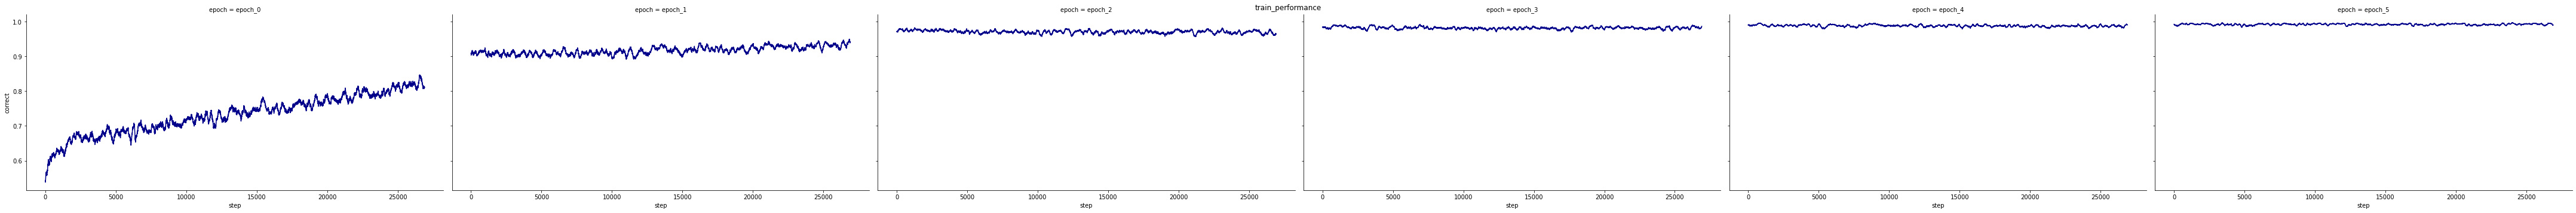

In [26]:
g = sns.FacetGrid(data=adf, col='epoch', size=5, aspect=2, sharey=True)
g.map(sns.lineplot, 'step', 'correct', color='darkblue')
plt.suptitle('train_performance')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


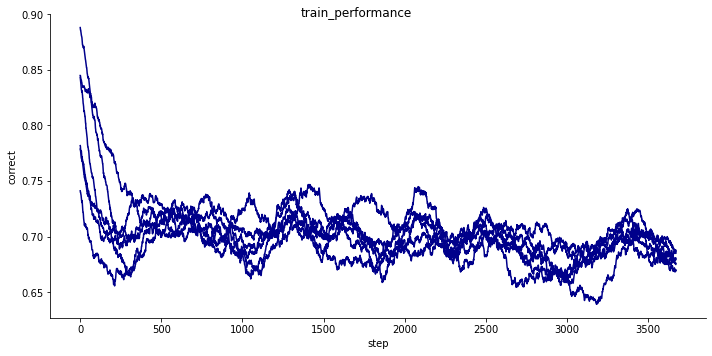

In [30]:
g = sns.FacetGrid(data=atdf, hue='epoch', size=5, aspect=2, sharey=True)
g.map(sns.lineplot, 'step', 'correct', color='darkblue')
plt.suptitle('train_performance')
plt.show()

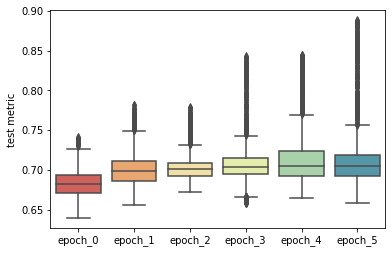

In [27]:
sns.boxplot(data=atdf, x='epoch', y='correct', palette='Spectral')
plt.ylabel('test metric')
plt.xlabel('')
plt.show()